<a href="https://colab.research.google.com/github/hn-iiitd/ML_Project/blob/madhav/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!curl -L -o archive.zip https://www.kaggle.com/api/v1/datasets/download/rabieelkharoua/predict-online-gaming-behavior-dataset
!unzip archive.zip
fd = pd.read_csv("./online_gaming_behavior_dataset.csv")
fd.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  903k  100  903k    0     0   465k      0  0:00:01  0:00:01 --:--:-- 1084k
Archive:  archive.zip
replace online_gaming_behavior_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: online_gaming_behavior_dataset.csv  


,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

label_encoder = LabelEncoder()


y = fd["InGamePurchases"].values
fd['Gender'] = label_encoder.fit_transform(fd['Gender'])
fd['Location'] = label_encoder.fit_transform(fd['Location'])
fd['GameGenre'] = label_encoder.fit_transform(fd['GameGenre'])
fd['GameDifficulty'] = label_encoder.fit_transform(fd['GameDifficulty'])
fd['EngagementLevel'] = label_encoder.fit_transform(fd['EngagementLevel'])
X_train = fd.drop(columns=['InGamePurchases','PlayerID'])

print(X_train)


# from sklearn.linear_model import Perceptron

# perceptron = Perceptron()
# perceptron.fit(X, y)

# # Check accuracy
# accuracy = perceptron.score(X, y)
# print(f'Accuracy: {accuracy:.2f}')

       Age  Gender  Location  GameGenre  PlayTimeHours  GameDifficulty  \
0       43       1         2          4      16.271119               2   
1       29       0         3          4       5.525961               2   
2       22       0         3          3       8.223755               0   
3       35       1         3          0       5.265351               0   
4       33       1         1          0      15.531945               2   
...    ...     ...       ...        ...            ...             ...   
40029   32       1         3          4      20.619662               0   
40030   44       0         2          2      13.539280               1   
40031   15       0         3          1       0.240057               0   
40032   34       1         3          3      14.017818               2   
40033   19       1         3          3      10.083804               0   

       SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0                    6                       

In [ ]:
# !pip install lazypredict
# import lazypredict
from sklearn.model_selection import train_test_split

# from lazypredict.Supervised import LazyClassifier

X_train, X_test, y_train, y_test = train_test_split(X_train, y,test_size=0.2,random_state =123)

# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit(X_train, X_test, y_train, y_test)
# print(models)

Class 0: 31993
Class 1: 8041
Proportion: 3.98 : 1


<Axes: title={'center': 'Count (target)'}, xlabel='InGamePurchases'>

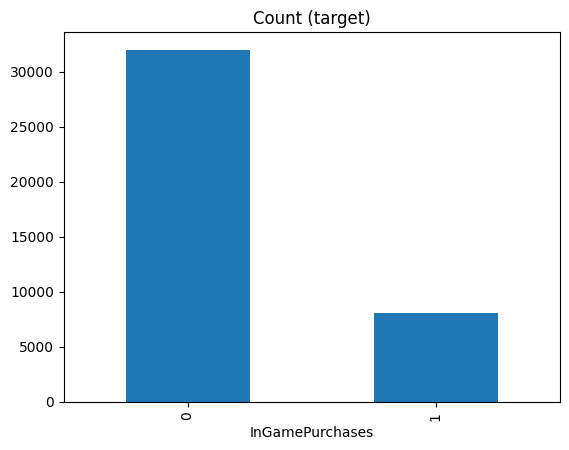

In [ ]:
# Let's change the dataset

from sklearn.utils import resample

target_count = fd['InGamePurchases'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)')



- https://www.kaggle.com/code/rafjaa/resampling-strategies-for-imbalanced-datasets

Random under-sampling:
InGamePurchases
0    8041
1    8041
Name: count, dtype: int64


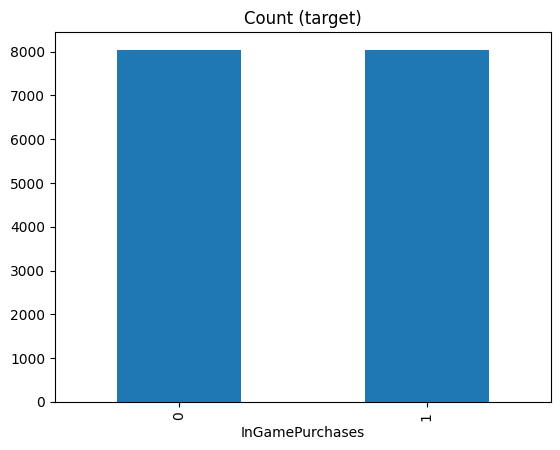

In [ ]:
count_class_0, count_class_1 = fd['InGamePurchases'].value_counts()

df_class_0 = fd[fd['InGamePurchases'] == 0]
df_class_1 = fd[fd['InGamePurchases'] == 1]
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under["InGamePurchases"].value_counts())

df_test_under["InGamePurchases"].value_counts().plot(kind='bar', title='Count (target)');

Random over-sampling:
InGamePurchases
0    31993
1    31993
Name: count, dtype: int64


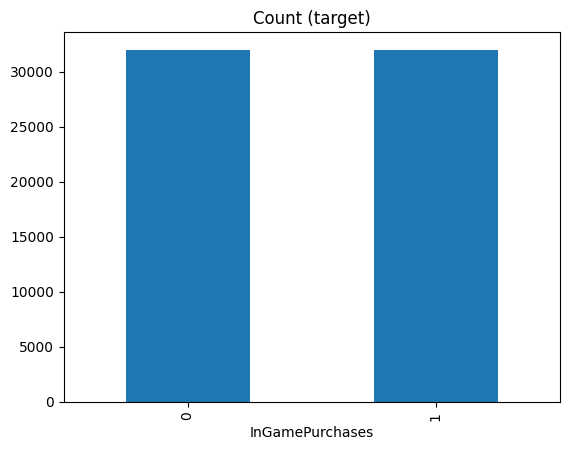

In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over["InGamePurchases"].value_counts())

df_test_over["InGamePurchases"].value_counts().plot(kind='bar', title='Count (target)');

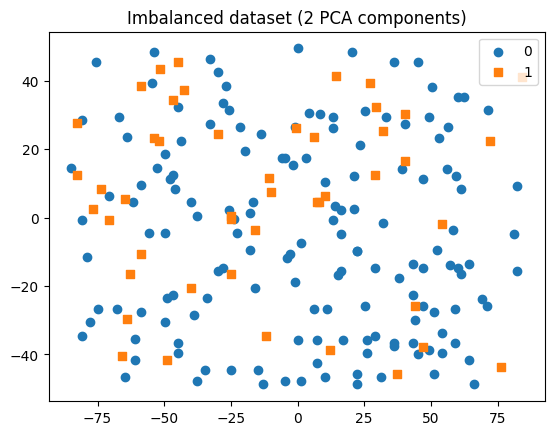

In [ ]:
import imblearn
from sklearn.decomposition import PCA
def plot_2d_space(X, y, label='Classes'):
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

pca = PCA(n_components=2)
X = pca.fit_transform(X_train)

plot_2d_space(X[:200], y[:200], 'Imbalanced dataset (2 PCA components)')

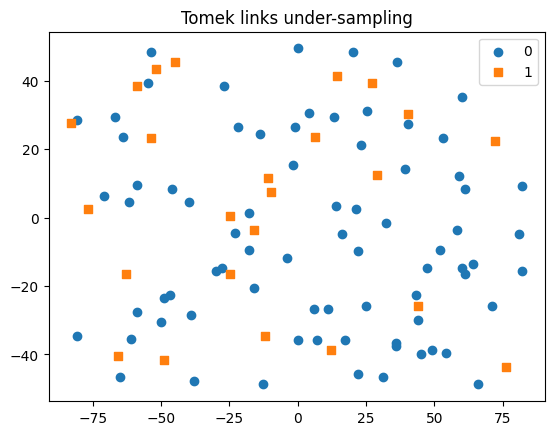

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_resample(X, y)

# print('Removed indexes:', id_tl)

plot_2d_space(X_tl[:100], y_tl[:100], 'Tomek links under-sampling')

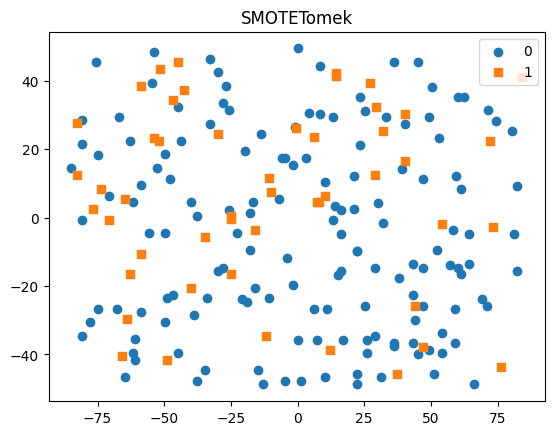

In [ ]:
from imblearn.combine import SMOTETomek

tl = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_tl, y_tl = tl.fit_resample(X, y)
plot_2d_space(X_tl[:200],y_tl[:200],"SMOTETomek")


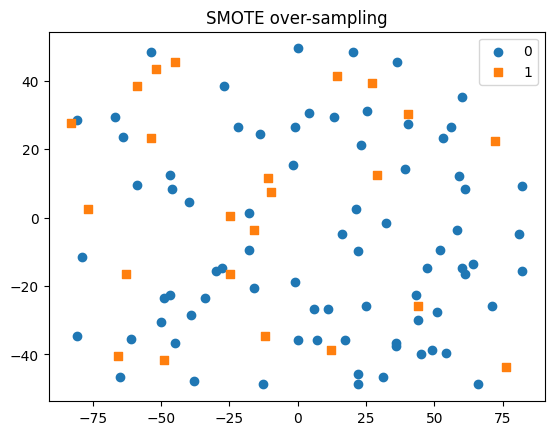

[[ 13.23300797  29.32907558]
 [ 49.17121273 -38.77201972]
 [ 47.18962747 -14.63760618]
 ...
 [-23.51877789 -36.28886744]
 [ 81.77909898 -38.71833601]
 [-48.79153186 -41.64533082]]


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

plot_2d_space(X_sm[:100], y_sm[:100], 'SMOTE over-sampling')
print(X_sm)

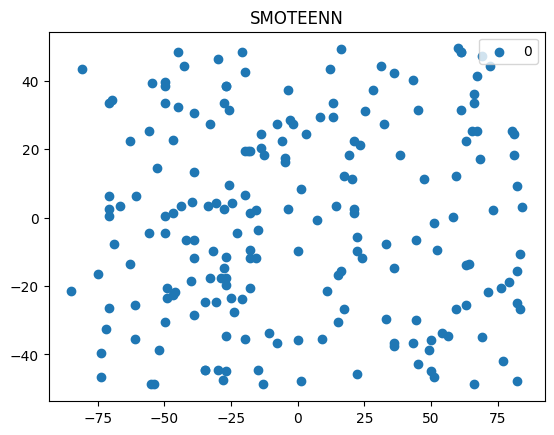

In [ ]:
from imblearn.combine import SMOTEENN
smoteenn = SMOTEENN(sampling_strategy="minority")
X_smnn, y_smnn = smoteenn.fit_resample(X,y)
plot_2d_space(X_smnn[:200],y_smnn[:200],"SMOTEENN")

In [ ]:
print(X_train)

       Age  Gender  Location  GameGenre  PlayTimeHours  GameDifficulty  \
0       43       1         2          4      16.271119               2   
1       29       0         3          4       5.525961               2   
2       22       0         3          3       8.223755               0   
3       35       1         3          0       5.265351               0   
4       33       1         1          0      15.531945               2   
...    ...     ...       ...        ...            ...             ...   
40029   32       1         3          4      20.619662               0   
40030   44       0         2          2      13.539280               1   
40031   15       0         3          1       0.240057               0   
40032   34       1         3          3      14.017818               2   
40033   19       1         3          3      10.083804               0   

       SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0                    6                       

In [ ]:
x_train_smote , y_train_smote = smote.fit_resample(X_train,y_train)

print(x_train_smote)

       Age  Gender  Location  GameGenre  PlayTimeHours  GameDifficulty  \
0       18       0         3          3       2.742359               0   
1       43       1         1          0      21.959875               0   
2       17       0         1          3      13.066035               1   
3       44       1         0          3      23.417357               0   
4       19       0         2          4      16.328373               2   
...    ...     ...       ...        ...            ...             ...   
51145   39       1         2          0      20.663501               0   
51146   18       1         0          1       2.352487               0   
51147   44       1         1          3      11.399000               0   
51148   26       1         3          0      19.323105               1   
51149   21       0         1          2      15.017455               0   

       SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0                   19                       

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10, min_samples_leaf=2, random_state=42)
# decision_tree.fit(X_train, y_train)
# dec_tree_accuracy = accuracy_score(y_test, y_pred_dec_tree)

In [ ]:
from sklearn.feature_selection import RFE


from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10, min_samples_leaf=2, random_state=42)
rfe = RFE(decision_tree, n_features_to_select=6)
rfe.fit(x_train_smote, y_train_smote)

RFE(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                     min_samples_leaf=2, min_samples_split=10,
                                     random_state=42),
    n_features_to_select=6)

In [ ]:
# from operator import itemgetter
# features = X_train.columns.to_list()
# for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
#     print(x, y)
from sklearn.metrics import accuracy_score
print(rfe.support_)
print(x_train_smote)
model = decision_tree.fit(x_train_smote,y_train_smote)
pred = model.predict(X_test)
print(accuracy_score(y_test, pred))


[False  True  True  True  True  True False  True False False False]
       Age  Gender  Location  GameGenre  PlayTimeHours  GameDifficulty  \
0       18       0         3          3       2.742359               0   
1       43       1         1          0      21.959875               0   
2       17       0         1          3      13.066035               1   
3       44       1         0          3      23.417357               0   
4       19       0         2          4      16.328373               2   
...    ...     ...       ...        ...            ...             ...   
51145   39       1         2          0      20.663501               0   
51146   18       1         0          1       2.352487               0   
51147   44       1         1          3      11.399000               0   
51148   26       1         3          0      19.323105               1   
51149   21       0         1          2      15.017455               0   

       SessionsPerWeek  AvgSessionDurationM

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

# Load dataset
dataset = pd.read_csv("./online_gaming_behavior_dataset.csv")

# Define target variable and features
y = dataset["InGamePurchases"].values
X = dataset.drop(columns='InGamePurchases')

# One-hot encoding of categorical features
categorical_columns = ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Min-Max scaling of numeric features
numeric_columns = ['Age', 'PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']
scaler = MinMaxScaler()
X_encoded[numeric_columns] = scaler.fit_transform(X_encoded[numeric_columns])

# Convert to numpy array
X = X_encoded.values

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Logistic Regression with class weighting
log_reg = LogisticRegression(C=0.001, solver='lbfgs', max_iter=10000)
log_reg.fit(X_train, y_train)

# Decision Tree with class weighting
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10, min_samples_leaf=2, random_state=42)
decision_tree.fit(X_train, y_train)

# Performance of Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)

# Performance of Decision Tree
y_pred_dec_tree = decision_tree.predict(X_test)
dec_tree_accuracy = accuracy_score(y_test, y_pred_dec_tree)

# Results
print("Logistic Regression Accuracy:", log_reg_accuracy)
print("\nDecision Tree Accuracy:", dec_tree_accuracy)

# Cross-validation accuracy
scores = cross_val_score(log_reg, X_train, y_train, cv=10)
print(f"Cross-validated accuracy (Logistic Regression): {scores.mean():.2f}")


from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=10, min_samples_leaf=2, random_state=42,n_estimators=100)

rf.fit(X_train,y_train)
pred = rf.predict(X_test)
print(accuracy_score(y_test,pred))

Logistic Regression Accuracy: 0.5085169557743398

Decision Tree Accuracy: 0.8598999843725582
Cross-validated accuracy (Logistic Regression): 0.51
0.8717768401312705


In [ ]:
# https://www.kaggle.com/code/carlmcbrideellis/recursive-feature-elimination-rfe-example